In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from datetime import date
import calendar

In [2]:
main = pd.read_csv('amazon.csv', parse_dates = ['Order Date'], keep_default_na = False)
df = main.copy()

pd.options.display.max_columns = None
df = df[df['Order Date'] < '2021-01-01']

# exploratory analysis

In [3]:
df.head(3)

,Order Date,Order ID,Title,Category,ASIN/ISBN,UNSPSC Code,Website,Release Date,Condition,Seller,Seller Credentials,List Price Per Unit,Purchase Price Per Unit,Quantity,Payment Instrument Type,Purchase Order Number,PO Line Number,Ordering Customer Email,Shipment Date,Shipping Address Name,Shipping Address City,Shipping Address State,Shipping Address Zip,Order Status,Carrier Name & Tracking Number,Item Subtotal,Item Subtotal Tax,Item Total,Tax Exemption Applied,Tax Exemption Type,Exemption Opt-Out,Buyer Name,Currency,Group Name
0,2019-01-01,111-8535807-9721,Maxboost Car Charger with SmartUSB Port 4.8A/2...,CHARGING_ADAPTER,B00ISGCAJM,26111700,Amazon.com,,new,power-innovation,,$19.95,$9.99,1,Visa - 1305,,,ethan@yahoo.com,1/2/2019,Brother,Whitestone,New York,11357,Shipped,USPS(93612896970905494011),$9.99,$0.00,$9.99,,,,Brother,USD,
1,2019-01-01,111-3462568-7454,NETGEAR Wi-Fi Range Extender EX3700 - Coverage...,ANTENNA,B00R92CL5E,43222608,Amazon.com,,new,Amazon.com,,$44.99,$25.99,1,Visa - 1305,,,ethan@yahoo.com,1/2/2019,Brother,Whitestone,New York,11357,Shipped,USPS(93612896970905494011),$25.99,$2.31,$28.30,,,,Brother,USD,
2,2019-01-04,112-1319538-4639,"Senior ICare Knee Warmers, Elastic Cotton Knee...",ORTHOPEDIC_BRACE,B0795C73ZQ,53131600,Amazon.com,,new,Senior Care Innovation,,$29.99,$19.99,1,MasterCard - 8095,,,ethan@yahoo.com,1/5/2019,Wife,BAYSIDE,NY,11360-2346,Shipped,USPS(93748896970904754166),$19.99,$0.00,$19.99,,,,Brother,USD,


In [4]:
df.shape

(1202, 34)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1202 entries, 0 to 1206
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Order Date                      1202 non-null   datetime64[ns]
 1   Order ID                        1202 non-null   object        
 2   Title                           1202 non-null   object        
 3   Category                        1202 non-null   object        
 4   ASIN/ISBN                       1202 non-null   object        
 5   UNSPSC Code                     1202 non-null   object        
 6   Website                         1202 non-null   object        
 7   Release Date                    1202 non-null   object        
 8   Condition                       1202 non-null   object        
 9   Seller                          1202 non-null   object        
 10  Seller Credentials              1202 non-null   object        
 11  List

In [6]:
prices = ['List Price Per Unit', 'Purchase Price Per Unit', 'Item Subtotal', 'Item Subtotal Tax', 'Item Total']

In [7]:
for col in prices:
    df[col] = df[col].apply(lambda x: float(x[1:]))

In [8]:
df.head(3)

,Order Date,Order ID,Title,Category,ASIN/ISBN,UNSPSC Code,Website,Release Date,Condition,Seller,Seller Credentials,List Price Per Unit,Purchase Price Per Unit,Quantity,Payment Instrument Type,Purchase Order Number,PO Line Number,Ordering Customer Email,Shipment Date,Shipping Address Name,Shipping Address City,Shipping Address State,Shipping Address Zip,Order Status,Carrier Name & Tracking Number,Item Subtotal,Item Subtotal Tax,Item Total,Tax Exemption Applied,Tax Exemption Type,Exemption Opt-Out,Buyer Name,Currency,Group Name
0,2019-01-01,111-8535807-9721,Maxboost Car Charger with SmartUSB Port 4.8A/2...,CHARGING_ADAPTER,B00ISGCAJM,26111700,Amazon.com,,new,power-innovation,,19.95,9.99,1,Visa - 1305,,,ethan@yahoo.com,1/2/2019,Brother,Whitestone,New York,11357,Shipped,USPS(93612896970905494011),9.99,0.00,9.99,,,,Brother,USD,
1,2019-01-01,111-3462568-7454,NETGEAR Wi-Fi Range Extender EX3700 - Coverage...,ANTENNA,B00R92CL5E,43222608,Amazon.com,,new,Amazon.com,,44.99,25.99,1,Visa - 1305,,,ethan@yahoo.com,1/2/2019,Brother,Whitestone,New York,11357,Shipped,USPS(93612896970905494011),25.99,2.31,28.30,,,,Brother,USD,
2,2019-01-04,112-1319538-4639,"Senior ICare Knee Warmers, Elastic Cotton Knee...",ORTHOPEDIC_BRACE,B0795C73ZQ,53131600,Amazon.com,,new,Senior Care Innovation,,29.99,19.99,1,MasterCard - 8095,,,ethan@yahoo.com,1/5/2019,Wife,BAYSIDE,NY,11360-2346,Shipped,USPS(93748896970904754166),19.99,0.00,19.99,,,,Brother,USD,


In [9]:
len(df['Website'].unique())

1

In [10]:
df.columns

Index(['Order Date', 'Order ID', 'Title', 'Category', 'ASIN/ISBN',
       'UNSPSC Code', 'Website', 'Release Date', 'Condition', 'Seller',
       'Seller Credentials', 'List Price Per Unit', 'Purchase Price Per Unit',
       'Quantity', 'Payment Instrument Type', 'Purchase Order Number',
       'PO Line Number', 'Ordering Customer Email', 'Shipment Date',
       'Shipping Address Name', 'Shipping Address City',
       'Shipping Address State', 'Shipping Address Zip', 'Order Status',
       'Carrier Name & Tracking Number', 'Item Subtotal', 'Item Subtotal Tax',
       'Item Total', 'Tax Exemption Applied', 'Tax Exemption Type',
       'Exemption Opt-Out', 'Buyer Name', 'Currency', 'Group Name'],
      dtype='object')

In [11]:
for i in df.columns:
    if df[i].nunique() <=1:
        print(i)
        df.drop(columns = i, inplace = True)

Website
Condition
Purchase Order Number
PO Line Number
Ordering Customer Email
Tax Exemption Type
Buyer Name
Currency
Group Name


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1202 entries, 0 to 1206
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Order Date                      1202 non-null   datetime64[ns]
 1   Order ID                        1202 non-null   object        
 2   Title                           1202 non-null   object        
 3   Category                        1202 non-null   object        
 4   ASIN/ISBN                       1202 non-null   object        
 5   UNSPSC Code                     1202 non-null   object        
 6   Release Date                    1202 non-null   object        
 7   Seller                          1202 non-null   object        
 8   Seller Credentials              1202 non-null   object        
 9   List Price Per Unit             1202 non-null   float64       
 10  Purchase Price Per Unit         1202 non-null   float64       
 11  Quan

In [13]:
df.drop(columns = ['ASIN/ISBN', 'UNSPSC Code'], inplace = True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1202 entries, 0 to 1206
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Order Date                      1202 non-null   datetime64[ns]
 1   Order ID                        1202 non-null   object        
 2   Title                           1202 non-null   object        
 3   Category                        1202 non-null   object        
 4   Release Date                    1202 non-null   object        
 5   Seller                          1202 non-null   object        
 6   Seller Credentials              1202 non-null   object        
 7   List Price Per Unit             1202 non-null   float64       
 8   Purchase Price Per Unit         1202 non-null   float64       
 9   Quantity                        1202 non-null   int64         
 10  Payment Instrument Type         1202 non-null   object        
 11  Ship

In [15]:
df['Payment Instrument Type'].unique()

array(['Visa - 1305', 'MasterCard - 8095', 'Visa - 3537', 'Visa - 3961',
       'Visa - 5554', 'MasterCard - 8503', 'Visa - 1110', 'Discover6371',
       'Visa - 5554 and Gift Certificate/Card', 'MasterCard - 8136',
       'Visa - 6856', 'Visa - 6802', 'Gift Certificate/Card',
       'Visa - 9341', 'Gift Certificate/Card and MasterCard - 8136',
       'Visa - 6481', 'Visa - 2960', 'Discover9922',
       'Discover9922 and Gift Certificate/Card',
       'Gift Certificate/Card and Visa - 5554', 'Visa - 6931',
       'Visa - 2892', 'Visa - 8094', 'Visa - 5288',
       'MasterCard - 8136 and Gift Certificate/Card',
       'Gift Certificate/Card and Discover9922', 'MasterCard - 3075',
       'MasterCard - 5249', 'Gift Certificate/Card and MasterCard - 5249',
       'MasterCard - 5249 and Gift Certificate/Card', 'MasterCard - 3365',
       'MasterCard - 6559', 'MasterCard - 6559 and Gift Certificate/Card',
       'Discover5197', 'MasterCard - 3846',
       'Gift Certificate/Card and Discover5

In [16]:
df['Payment Instrument Type'][0].split("-")[0].strip()

'Visa'

In [17]:
df['Payment Method'] = df['Payment Instrument Type'].str.replace('Gift Certificate/Card','Gift Card', regex = True)

In [18]:
df['Payment Instrument Type'].unique()

array(['Visa - 1305', 'MasterCard - 8095', 'Visa - 3537', 'Visa - 3961',
       'Visa - 5554', 'MasterCard - 8503', 'Visa - 1110', 'Discover6371',
       'Visa - 5554 and Gift Certificate/Card', 'MasterCard - 8136',
       'Visa - 6856', 'Visa - 6802', 'Gift Certificate/Card',
       'Visa - 9341', 'Gift Certificate/Card and MasterCard - 8136',
       'Visa - 6481', 'Visa - 2960', 'Discover9922',
       'Discover9922 and Gift Certificate/Card',
       'Gift Certificate/Card and Visa - 5554', 'Visa - 6931',
       'Visa - 2892', 'Visa - 8094', 'Visa - 5288',
       'MasterCard - 8136 and Gift Certificate/Card',
       'Gift Certificate/Card and Discover9922', 'MasterCard - 3075',
       'MasterCard - 5249', 'Gift Certificate/Card and MasterCard - 5249',
       'MasterCard - 5249 and Gift Certificate/Card', 'MasterCard - 3365',
       'MasterCard - 6559', 'MasterCard - 6559 and Gift Certificate/Card',
       'Discover5197', 'MasterCard - 3846',
       'Gift Certificate/Card and Discover5

In [19]:
df['Payment Method'].unique()

array(['Visa - 1305', 'MasterCard - 8095', 'Visa - 3537', 'Visa - 3961',
       'Visa - 5554', 'MasterCard - 8503', 'Visa - 1110', 'Discover6371',
       'Visa - 5554 and Gift Card', 'MasterCard - 8136', 'Visa - 6856',
       'Visa - 6802', 'Gift Card', 'Visa - 9341',
       'Gift Card and MasterCard - 8136', 'Visa - 6481', 'Visa - 2960',
       'Discover9922', 'Discover9922 and Gift Card',
       'Gift Card and Visa - 5554', 'Visa - 6931', 'Visa - 2892',
       'Visa - 8094', 'Visa - 5288', 'MasterCard - 8136 and Gift Card',
       'Gift Card and Discover9922', 'MasterCard - 3075',
       'MasterCard - 5249', 'Gift Card and MasterCard - 5249',
       'MasterCard - 5249 and Gift Card', 'MasterCard - 3365',
       'MasterCard - 6559', 'MasterCard - 6559 and Gift Card',
       'Discover5197', 'MasterCard - 3846', 'Gift Card and Discover5197',
       'Discover5197 and Gift Card', 'Visa - 9800', 'Visa - 6348',
       'Visa - 6157'], dtype=object)

In [20]:
def cardtype(x):
    if x == 'Gift Card':
        return 'Gift Card'
    elif 'Visa' in x:
        return 'Visa'
    elif 'MasterCard' in x:
        return 'MasterCard'
    elif 'Discover' in x:
        return 'Discover'

In [21]:
df['Card Type'] = df['Payment Method'].apply(lambda x: cardtype(x))

In [22]:
# df['Carrier Name & Tracking Number'].apply(lambda x: x.split("("))

In [23]:
df

,Order Date,Order ID,Title,Category,Release Date,Seller,Seller Credentials,List Price Per Unit,Purchase Price Per Unit,Quantity,Payment Instrument Type,Shipment Date,Shipping Address Name,Shipping Address City,Shipping Address State,Shipping Address Zip,Order Status,Carrier Name & Tracking Number,Item Subtotal,Item Subtotal Tax,Item Total,Tax Exemption Applied,Exemption Opt-Out,Payment Method,Card Type
0,2019-01-01,111-8535807-9721,Maxboost Car Charger with SmartUSB Port 4.8A/2...,CHARGING_ADAPTER,,power-innovation,,19.95,9.99,1,Visa - 1305,1/2/2019,Brother,Whitestone,New York,11357,Shipped,USPS(93612896970905494011),9.99,0.00,9.99,,,Visa - 1305,Visa
1,2019-01-01,111-3462568-7454,NETGEAR Wi-Fi Range Extender EX3700 - Coverage...,ANTENNA,,Amazon.com,,44.99,25.99,1,Visa - 1305,1/2/2019,Brother,Whitestone,New York,11357,Shipped,USPS(93612896970905494011),25.99,2.31,28.30,,,Visa - 1305,Visa
2,2019-01-04,112-1319538-4639,"Senior ICare Knee Warmers, Elastic Cotton Knee...",ORTHOPEDIC_BRACE,,Senior Care Innovation,,29.99,19.99,1,MasterCard - 8095,1/5/2019,Wife,BAYSIDE,NY,11360-2346,Shipped,USPS(93748896970904754166),19.99,0.00,19.99,,,MasterCard - 8095,MasterCard
3,2019-01-05,111-9897613-7573,"Morex Poly Crimped Curling Ribbon, 3/16-Inch b...",DECORATIVE_RIBBON_TRIM,,Amazon.com,,3.29,7.32,1,Visa - 1305,1/6/2019,Brother,Whitestone,New York,11357,Shipped,USPS(93748896970904767582),7.32,0.00,7.32,,,Visa - 1305,Visa
4,2019-01-06,111-6983886-1106,Westone W40 Four-Driver True-Fit Earphones wit...,HEADPHONES,,Westone Audio,,0.00,329.99,1,Visa - 3537,1/6/2019,Brother,Whitestone,New York,11357,Shipped,LASERSHIP(LX338613),329.99,0.00,329.99,,,Visa - 3537,Visa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202,2020-05-10,111-8047733-3965,Homenery Under Bed Storage Plastic Fabric - St...,STORAGE_BOX,,SquareXchange,,0.00,19.95,0,MasterCard - 8136,,Ethan,BAYSIDE,NY,11360-2346,,,0.00,0.00,0.00,,,MasterCard - 8136,MasterCard
1203,2020-06-17,111-3942540-5680,Gerber Baby Boys' 4-Pack Gown,NIGHTGOWN_NIGHTSHIRT,,Amazon.com,,16.99,16.99,0,MasterCard - 8136,,Ethan,BAYSIDE,NY,11360-2346,,,0.00,0.00,0.00,,,MasterCard - 8136,MasterCard
1204,2020-10-10,111-5904432-8467,Grillart Grill Brush and Scraper 18 Inch - Wir...,CLEANING_BRUSH,,Geeker Cook,,22.97,16.95,0,Discover9922,,Ethan,Bayside,NY,11360,,,0.00,0.00,0.00,,,Discover9922,Discover
1205,2020-07-22,111-2866800-3497,Sakura Pigma 50034 Micron Blister Card Ink Pen...,WRITING_INSTRUMENT,,Amazon.com,,17.39,12.26,0,MasterCard - 5249 and Gift Certificate/Card,,Wife,BAYSIDE,NY,11360-2346,,,0.00,0.00,0.00,,,MasterCard - 5249 and Gift Card,MasterCard


In [24]:
ny = df['Shipping Address City'] == 'NY'

In [25]:
df.loc[ny, 'Shipping Address City'] = 'NEW YORK'

In [26]:
df['Carrier Name & Tracking Number'][0].split("(")[0]

'USPS'

In [27]:
df['Carrier'] = df['Carrier Name & Tracking Number'].apply(lambda x: x.split('(')[0])

In [28]:
df['Carrier'].unique()

array(['USPS', 'LASERSHIP', 'AMZN', 'UPS', 'Japan P)', 'FedEx', 'UPSMI',
       'UPSM', 'Amazon Shipping', 'AMZN_US', 'YANWEN', 'China Post',
       'Yun Express', 'FedEx SmartPost', 'RABBIT', 'DYNAMEX', '',
       'SUREPOST'], dtype=object)

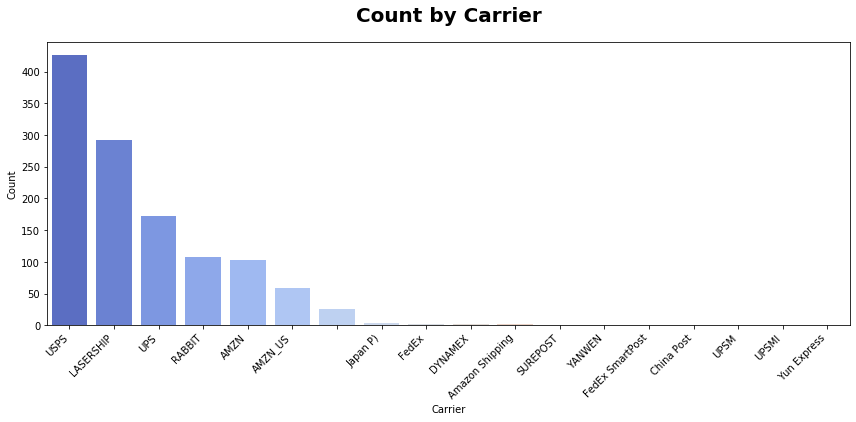

In [29]:
plt.figure(figsize = (12,6))
g = sns.countplot(x= 'Carrier', 
                  data = df, 
                  order = df.groupby('Carrier').count()['Order Date'].sort_values(ascending = False).index,
                 palette = 'coolwarm')
g.set_xticklabels(g.get_xticklabels(), 
                  rotation = 45, 
                  ha = 'right')
plt.xlabel('Carrier')
plt.ylabel('Count')
plt.title('Count by Carrier', 
          fontsize = 20, 
          y=1.05, 
          weight = 'bold')
plt.tight_layout()
plt.show()

In [30]:
df['Shipping Address City'] = df['Shipping Address City'].str.upper()

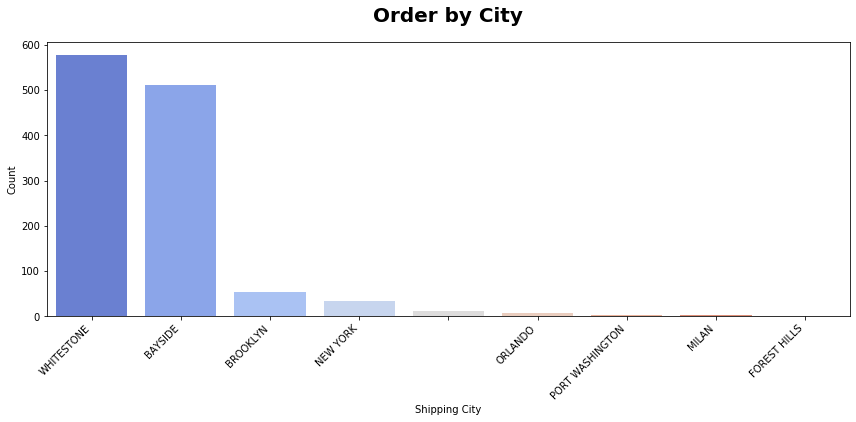

In [31]:
plt.figure(figsize = (12,6))
city_count = sns.countplot(x='Shipping Address City', 
                           data = df, 
                           order = df.groupby('Shipping Address City').count()['Order Date'].sort_values(ascending = False).index,
                          palette = 'coolwarm')
city_count.set_xticklabels(city_count.get_xticklabels(), 
                  rotation = 45, 
                  ha = 'right')
plt.xlabel('Shipping City')
plt.ylabel('Count')
plt.title('Order by City',
          fontsize = 20, 
          y=1.05, 
          weight = 'bold')

plt.tight_layout()
plt.show()

In [32]:
city_sum = df.groupby('Shipping Address City').sum()['Item Total'].sort_values(ascending = False)

In [33]:
city_sum = city_sum.reset_index()

In [34]:
city_sum

,Shipping Address City,Item Total
0,WHITESTONE,19071.91
1,BAYSIDE,13599.23
2,BROOKLYN,1218.85
3,,1123.02
4,NEW YORK,697.01
5,PORT WASHINGTON,318.83
6,FOREST HILLS,180.77
7,ORLANDO,145.57
8,MILAN,52.46


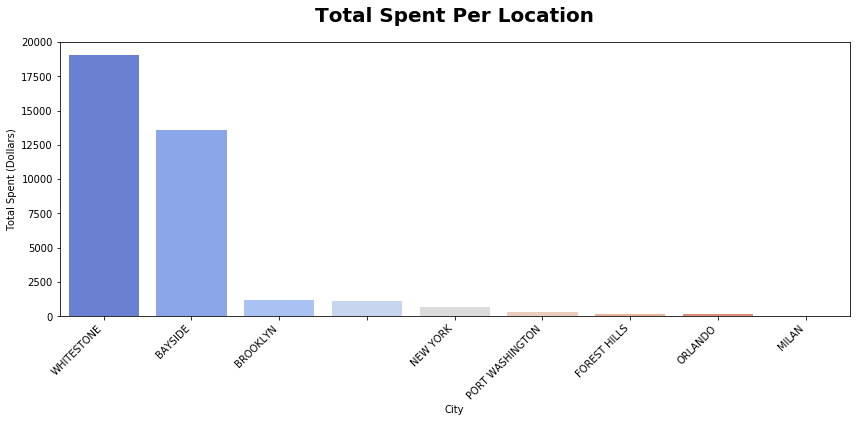

In [35]:
plt.figure(figsize = (12,6))
spent = sns.barplot(x='Shipping Address City', 
            y='Item Total', 
            data = city_sum, palette = 'coolwarm')

spent.set_xticklabels(spent.get_xticklabels(), 
                  rotation = 45, 
                  ha = 'right')

plt.xlabel('City')
plt.ylabel('Total Spent (Dollars)')
plt.title('Total Spent Per Location',
          fontsize = 20, 
          y=1.05, 
          weight = 'bold')

plt.tight_layout()
plt.show()

In [36]:
df['Order Date'] = df['Order Date'].apply(lambda x: x.date())

In [37]:
calendar.day_name[df['Order Date'][0].weekday()]

'Tuesday'

In [38]:
df['Order Date'][0]

datetime.date(2019, 1, 1)

In [39]:
df['Day'] = df['Order Date'].apply(lambda x: calendar.day_name[x.weekday()])

In [40]:
df.head(3)

,Order Date,Order ID,Title,Category,Release Date,Seller,Seller Credentials,List Price Per Unit,Purchase Price Per Unit,Quantity,Payment Instrument Type,Shipment Date,Shipping Address Name,Shipping Address City,Shipping Address State,Shipping Address Zip,Order Status,Carrier Name & Tracking Number,Item Subtotal,Item Subtotal Tax,Item Total,Tax Exemption Applied,Exemption Opt-Out,Payment Method,Card Type,Carrier,Day
0,2019-01-01,111-8535807-9721,Maxboost Car Charger with SmartUSB Port 4.8A/2...,CHARGING_ADAPTER,,power-innovation,,19.95,9.99,1,Visa - 1305,1/2/2019,Brother,WHITESTONE,New York,11357,Shipped,USPS(93612896970905494011),9.99,0.00,9.99,,,Visa - 1305,Visa,USPS,Tuesday
1,2019-01-01,111-3462568-7454,NETGEAR Wi-Fi Range Extender EX3700 - Coverage...,ANTENNA,,Amazon.com,,44.99,25.99,1,Visa - 1305,1/2/2019,Brother,WHITESTONE,New York,11357,Shipped,USPS(93612896970905494011),25.99,2.31,28.30,,,Visa - 1305,Visa,USPS,Tuesday
2,2019-01-04,112-1319538-4639,"Senior ICare Knee Warmers, Elastic Cotton Knee...",ORTHOPEDIC_BRACE,,Senior Care Innovation,,29.99,19.99,1,MasterCard - 8095,1/5/2019,Wife,BAYSIDE,NY,11360-2346,Shipped,USPS(93748896970904754166),19.99,0.00,19.99,,,MasterCard - 8095,MasterCard,USPS,Friday


In [41]:
total_by_day = df.groupby(by = 'Day').sum()['Item Total'].reset_index()

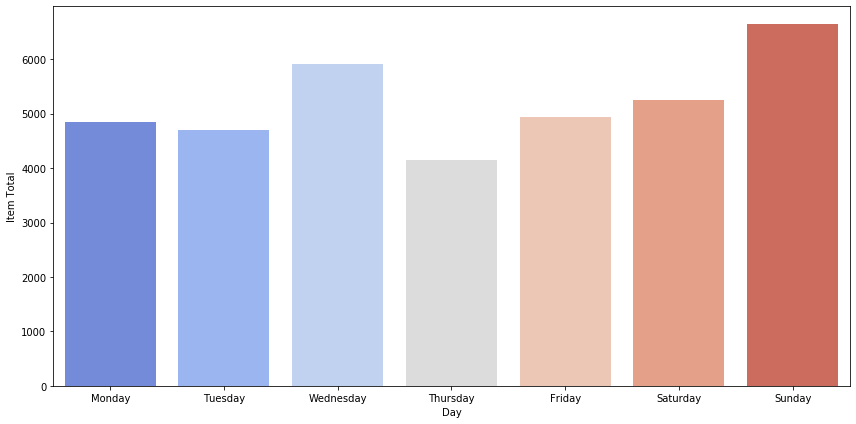

In [42]:
plt.figure(figsize = (12,6))

sns.barplot(x='Day',
           y='Item Total',
           data=total_by_day, order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
           palette = 'coolwarm')

plt.tight_layout()
plt.show()

In [43]:
df['Order Date'][0].month

1

In [44]:
df['Month'] = df['Order Date'].apply(lambda x: x.month)
df['Year'] = df['Order Date'].apply(lambda x: x.year)

In [45]:
sumbymonth = df.groupby('Month').sum()['Item Total'].reset_index()

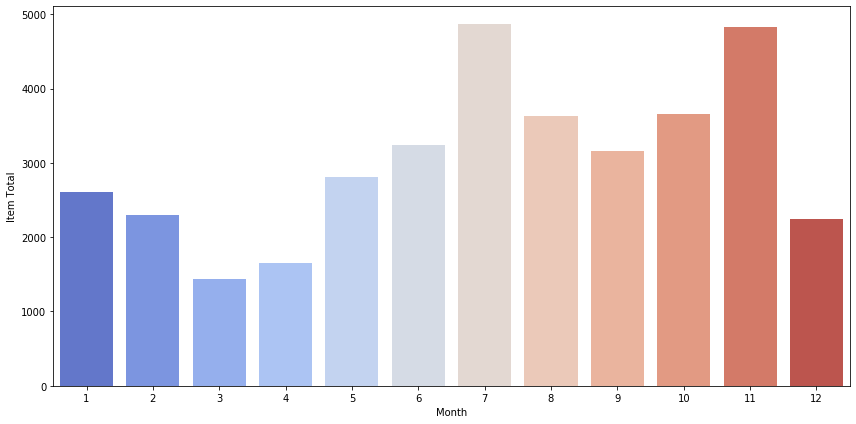

In [46]:
plt.figure(figsize = (12,6))

sns.barplot(x='Month',
           y='Item Total',
           data = sumbymonth,
           palette = 'coolwarm')

plt.tight_layout()
plt.show()

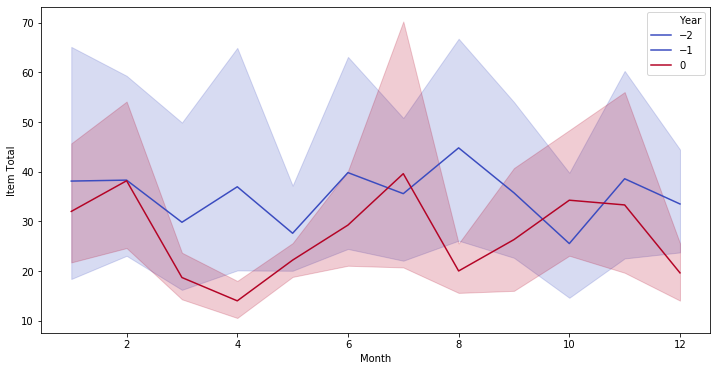

In [47]:
plt.figure(figsize = (12,6))
sns.lineplot(data=df, x='Month', y='Item Total', hue = 'Year', palette = 'coolwarm')

In [48]:
loc_day = df.groupby(['Day', 'Shipping Address City']).sum()['Item Total'].unstack().fillna(0)

In [49]:
loc_day

Shipping Address City,,BAYSIDE,BROOKLYN,FOREST HILLS,MILAN,NEW YORK,ORLANDO,PORT WASHINGTON,WHITESTONE
Day,,,,,,,,,
Friday,0.00,2074.27,332.00,0.00,0.00,219.86,0.00,0.00,2304.11
Monday,166.34,1774.58,144.17,0.00,0.00,55.04,0.00,182.06,2517.68
Saturday,0.00,2121.77,288.69,0.00,37.48,110.75,30.40,0.00,2653.44
Sunday,15.99,1992.68,166.60,0.00,14.98,158.23,0.00,41.30,4248.33
Thursday,228.51,1971.00,99.79,0.00,0.00,94.36,73.68,0.00,1677.96
Tuesday,0.00,1786.79,0.00,180.77,0.00,58.77,0.00,95.47,2575.74
Wednesday,712.18,1878.14,187.60,0.00,0.00,0.00,41.49,0.00,3094.65


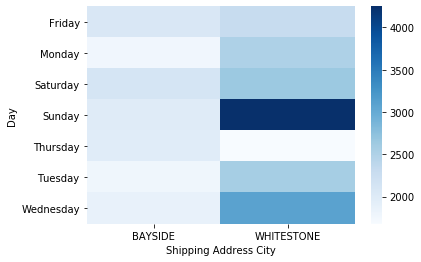

In [50]:
sns.heatmap(data = loc_day[['BAYSIDE', 'WHITESTONE']], cmap = 'Blues')

In [51]:
loc_day = df.groupby(['Day', 'Shipping Address City']).sum()['Item Total'].fillna(0)

In [52]:
loc_day = loc_day.reset_index().sort_values(by=['Shipping Address City', 'Item Total'])

In [53]:
modified_loc_day = loc_day[loc_day['Shipping Address City'].isin(['BAYSIDE', 'WHITESTONE'])]

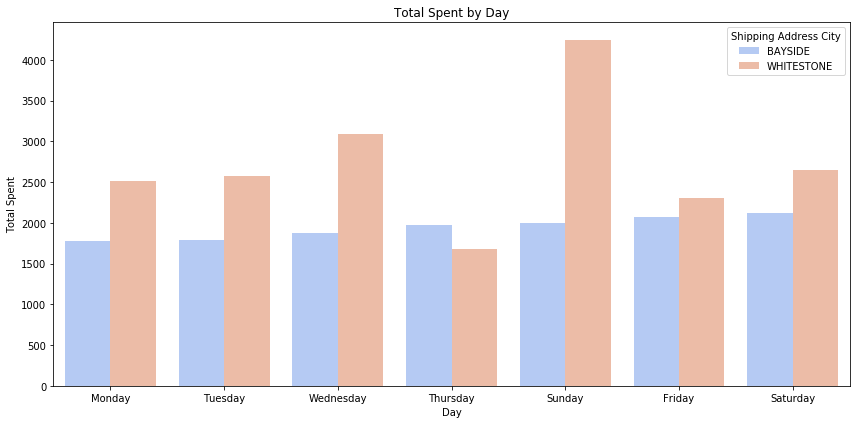

In [54]:
plt.figure(figsize=(12,6))

sns.barplot(x='Day', 
            y='Item Total', 
            data=modified_loc_day, 
            hue='Shipping Address City', 
            palette = 'coolwarm')
plt.xlabel('Day')
plt.ylabel('Total Spent')
plt.title('Total Spent by Day')
plt.tight_layout()
plt.show()

In [55]:
df.head()

,Order Date,Order ID,Title,Category,Release Date,Seller,Seller Credentials,List Price Per Unit,Purchase Price Per Unit,Quantity,Payment Instrument Type,Shipment Date,Shipping Address Name,Shipping Address City,Shipping Address State,Shipping Address Zip,Order Status,Carrier Name & Tracking Number,Item Subtotal,Item Subtotal Tax,Item Total,Tax Exemption Applied,Exemption Opt-Out,Payment Method,Card Type,Carrier,Day,Month,Year
0,2019-01-01,111-8535807-9721,Maxboost Car Charger with SmartUSB Port 4.8A/2...,CHARGING_ADAPTER,,power-innovation,,19.95,9.99,1,Visa - 1305,1/2/2019,Brother,WHITESTONE,New York,11357,Shipped,USPS(93612896970905494011),9.99,0.00,9.99,,,Visa - 1305,Visa,USPS,Tuesday,1,2019
1,2019-01-01,111-3462568-7454,NETGEAR Wi-Fi Range Extender EX3700 - Coverage...,ANTENNA,,Amazon.com,,44.99,25.99,1,Visa - 1305,1/2/2019,Brother,WHITESTONE,New York,11357,Shipped,USPS(93612896970905494011),25.99,2.31,28.30,,,Visa - 1305,Visa,USPS,Tuesday,1,2019
2,2019-01-04,112-1319538-4639,"Senior ICare Knee Warmers, Elastic Cotton Knee...",ORTHOPEDIC_BRACE,,Senior Care Innovation,,29.99,19.99,1,MasterCard - 8095,1/5/2019,Wife,BAYSIDE,NY,11360-2346,Shipped,USPS(93748896970904754166),19.99,0.00,19.99,,,MasterCard - 8095,MasterCard,USPS,Friday,1,2019
3,2019-01-05,111-9897613-7573,"Morex Poly Crimped Curling Ribbon, 3/16-Inch b...",DECORATIVE_RIBBON_TRIM,,Amazon.com,,3.29,7.32,1,Visa - 1305,1/6/2019,Brother,WHITESTONE,New York,11357,Shipped,USPS(93748896970904767582),7.32,0.00,7.32,,,Visa - 1305,Visa,USPS,Saturday,1,2019
4,2019-01-06,111-6983886-1106,Westone W40 Four-Driver True-Fit Earphones wit...,HEADPHONES,,Westone Audio,,0.00,329.99,1,Visa - 3537,1/6/2019,Brother,WHITESTONE,New York,11357,Shipped,LASERSHIP(LX338613),329.99,0.00,329.99,,,Visa - 3537,Visa,LASERSHIP,Sunday,1,2019


In [56]:
df.nunique()

Order Date                        450
Order ID                          873
Title                             907
Category                          291
Release Date                       70
Seller                            374
Seller Credentials                  5
List Price Per Unit               297
Purchase Price Per Unit           551
Quantity                           11
Payment Instrument Type            40
Shipment Date                     463
Shipping Address Name              11
Shipping Address City               9
Shipping Address State              5
Shipping Address Zip               19
Order Status                        2
Carrier Name & Tracking Number    852
Item Subtotal                     605
Item Subtotal Tax                 256
Item Total                        699
Tax Exemption Applied               2
Exemption Opt-Out                   2
Payment Method                     40
Card Type                           4
Carrier                            18
Day         

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1202 entries, 0 to 1206
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Order Date                      1202 non-null   object 
 1   Order ID                        1202 non-null   object 
 2   Title                           1202 non-null   object 
 3   Category                        1202 non-null   object 
 4   Release Date                    1202 non-null   object 
 5   Seller                          1202 non-null   object 
 6   Seller Credentials              1202 non-null   object 
 7   List Price Per Unit             1202 non-null   float64
 8   Purchase Price Per Unit         1202 non-null   float64
 9   Quantity                        1202 non-null   int64  
 10  Payment Instrument Type         1202 non-null   object 
 11  Shipment Date                   1202 non-null   object 
 12  Shipping Address Name           12

In [58]:
avg_by_day = df.groupby(by='Day').mean()[['Item Total']].reset_index().sort_values('Item Total')

In [59]:
avg_by_day = df.groupby(by=['Shipping Address City', 'Day']).mean()[['Item Total']].reset_index().sort_values('Item Total')

In [60]:
avg_by_day

,Shipping Address City,Day,Item Total
12,BROOKLYN,Monday,14.417000
19,MILAN,Sunday,14.980000
26,ORLANDO,Saturday,15.200000
1,,Sunday,15.990000
21,NEW YORK,Monday,18.346667
18,MILAN,Saturday,18.740000
8,BAYSIDE,Thursday,18.771429
5,BAYSIDE,Monday,19.288913
25,NEW YORK,Tuesday,19.590000
23,NEW YORK,Sunday,19.778750


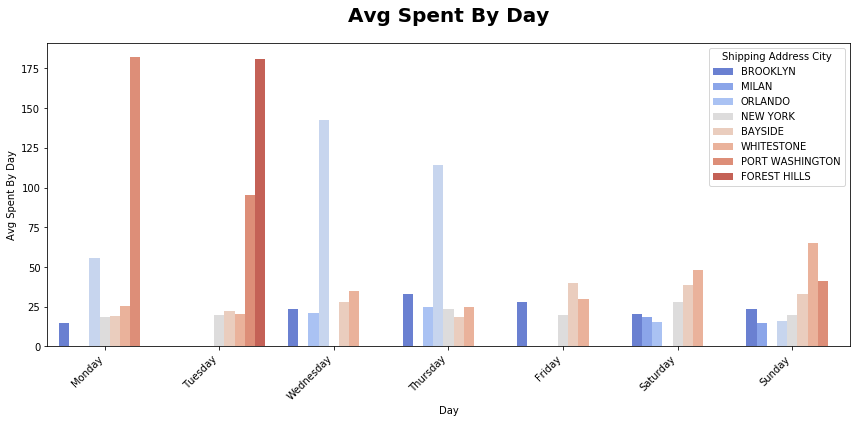

In [61]:
plt.figure(figsize = (12,6))
avg_day = sns.barplot(x='Day', y='Item Total', data=avg_by_day,hue = 'Shipping Address City',
                      order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                      palette = 'coolwarm'
    )
avg_day.set_xticklabels(avg_day.get_xticklabels(), 
                  rotation = 45, 
                  ha = 'right')

plt.xlabel('Day')
plt.ylabel('Avg Spent By Day')
plt.title('Avg Spent By Day',
          fontsize = 20, 
          y=1.05, 
          weight = 'bold')

plt.tight_layout()
plt.show()

In [63]:
avg_by_day = df.groupby(by=['Shipping Address City', 'Day']).mean()[['Item Total']]
avg_by_day.drop(index = '').unstack().fillna(0)

Item Total                                               \
Day                       Friday      Monday   Saturday     Sunday   Thursday   
Shipping Address City                                                           
BAYSIDE                39.889808   19.288913  38.577636  33.211333  18.771429   
BROOKLYN               27.666667   14.417000  20.620714  23.800000  33.263333   
FOREST HILLS            0.000000    0.000000   0.000000   0.000000   0.000000   
MILAN                   0.000000    0.000000  18.740000  14.980000   0.000000   
NEW YORK               19.987273   18.346667  27.687500  19.778750  23.590000   
ORLANDO                 0.000000    0.000000  15.200000   0.000000  24.560000   
PORT WASHINGTON         0.000000  182.060000   0.000000  41.300000   0.000000   
WHITESTONE             29.539872   25.690612  48.244364  65.358923  24.675882   

                                              
Day                       Tuesday  Wednesday  
Shipping Address City                         
BAYSIDE                 22.334875  27.619706  
BROOKLYN                 0.000000  23.450000  
FOREST HILLS           180.770000   0.000000  
MILAN                    0.000000   0.000000  
NEW YORK                19.590000   0.000000  
ORLANDO                  0.000000  20.745000  
PORT WASHINGTON         95.470000   0.000000  
WHITESTONE              20.605920  34.771348

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df['Category'].nunique()

In [ ]:
top10cats = pd.DataFrame(df.groupby('Category').sum()['Item Total'].nlargest(11)).reset_index()

In [ ]:
top10cats = top10cats[top10cats['Category'] != '']

## TOP 10 CATEGORIES SPENT

In [ ]:
top10cats

In [ ]:
df.groupby('Category').count()['Order ID'].nlargest(11)